In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


170500096/170498071 [==============================] - 1150s 7us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

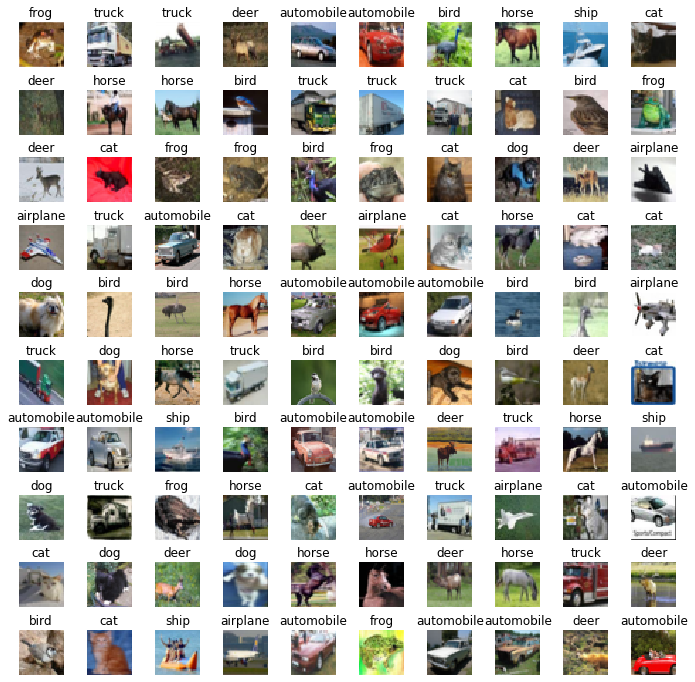

In [14]:
n_rows = 10
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], interpolation="nearest")
        plt.axis('off')
        plt.title(classes[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

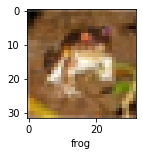

In [10]:
plot_sample(X_train, y_train, 0)

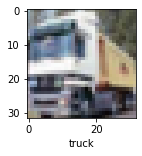

In [11]:
plot_sample(X_train, y_train, 1)


In [12]:
#Normalizing the training data
X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification

In [16]:
ann=models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/5
50000/50000 [==============================] - 98s 2ms/sample - loss: 1.8598 - acc: 0.3349
Epoch 2/5
50000/50000 [==============================] - 102s 2ms/sample - loss: 1.6592 - acc: 0.4143
Epoch 3/5
50000/50000 [==============================] - 120s 2ms/sample - loss: 1.5720 - acc: 0.4438
Epoch 4/5
50000/50000 [==============================] - 124s 2ms/sample - loss: 1.5111 - acc: 0.4668
Epoch 5/5
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.4576 - acc: 0.4851


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.44      0.58      0.50      1000
           1       0.72      0.40      0.52      1000
           2       0.28      0.54      0.37      1000
           3       0.37      0.18      0.24      1000
           4       0.49      0.32      0.39      1000
           5       0.36      0.45      0.40      1000
           6       0.48      0.53      0.50      1000
           7       0.58      0.49      0.53      1000
           8       0.51      0.68      0.58      1000
           9       0.67      0.33      0.44      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.45     10000
weighted avg       0.49      0.45      0.45     10000



Now let us build a convolutional neural network to train our images

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
50000/50000 [==============================] - 49s 984us/sample - loss: 0.5559 - acc: 0.8062
Epoch 2/20
50000/50000 [==============================] - 65s 1ms/sample - loss: 0.5181 - acc: 0.8190
Epoch 3/20
50000/50000 [==============================] - 61s 1ms/sample - loss: 0.4876 - acc: 0.8294
Epoch 4/20
50000/50000 [==============================] - 54s 1ms/sample - loss: 0.4592 - acc: 0.8380
Epoch 5/20
50000/50000 [==============================] - 60s 1ms/sample - loss: 0.4324 - acc: 0.8472
Epoch 6/20
50000/50000 [==============================] - 48s 965us/sample - loss: 0.4035 - acc: 0.8568
Epoch 7/20
50000/50000 [==============================] - 50s 1ms/sample - loss: 0.3809 - acc: 0.8653
Epoch 8/20
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.3589 - acc: 0.8727
Epoch 9/20
50000/50000 [==============================] - 50s 1ms/sample - loss: 0.3375 - acc: 0.8786
Epoch 10/20
50000/50000 [==============================] - 55s 1ms/sample - lo

In [21]:
cnn.evaluate(X_test,y_test)

10000/10000 [==============================] - 4s 408us/sample - loss: 2.0125 - acc: 0.6668


[2.0124586886405944, 0.6668]

In [22]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[6.48666683e-05, 6.90318302e-07, 2.69838011e-07, 8.80649269e-01,
        2.13086105e-06, 1.19275644e-01, 1.38705923e-06, 2.23688630e-07,
        5.58240117e-06, 3.80668275e-11],
       [1.80561077e-02, 6.30994976e-01, 1.17342802e-10, 3.48182846e-16,
        1.95381424e-16, 4.88658337e-16, 1.05348525e-16, 6.36567166e-25,
        3.50890905e-01, 5.80777159e-05],
       [1.17956810e-02, 1.87439062e-02, 3.13296437e-06, 1.95708894e-09,
        6.31283151e-11, 1.65338729e-08, 1.41712919e-10, 2.25299908e-13,
        9.69456613e-01, 7.17959381e-07],
       [9.99861121e-01, 2.88082003e-08, 2.21225264e-06, 4.91963359e-10,
        5.78019810e-09, 1.55246215e-12, 3.63358197e-07, 5.95620609e-15,
        1.36285002e-04, 3.93829171e-11],
       [2.81115973e-12, 6.84187906e-12, 4.79957544e-06, 7.46264845e-07,
        9.99991894e-01, 4.10614405e-08, 2.50849212e-06, 7.24668867e-11,
        4.89909708e-13, 4.31119653e-15]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 4]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6])

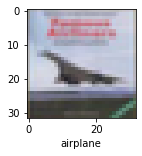

In [25]:
plot_sample(X_test, y_test,3)

In [26]:
classes[y_classes[3]]

'airplane'

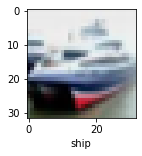

In [27]:
plot_sample(X_test, y_test,1)

In [28]:
classes[y_classes[1]]

'automobile'

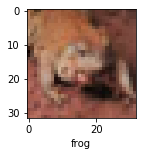

In [29]:
plot_sample(X_test, y_test,5)

In [30]:
classes[y_classes[5]]

'frog'

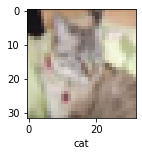

In [33]:
plot_sample(X_test, y_test,8)

In [34]:
classes[y_classes[8]]

'cat'